Veri çerçevesi, 1000 kayıttan oluşan, çeşitli demografik, finansal ve davranışsal özelliklere sahip bir müşteri verisini içermektedir. İlgili bilgiler arasında yaş, gelir, cinsiyet, harcama puanı, üyelik yılı, satın alma sıklığı ve son satın alma miktarı gibi çeşitli bilgiler bulunmaktadır. Ayrıca, kategorik değişkenler olarak cinsiyet ve tercih edilen kategori gibi alanlar da veri setinde mevcuttur.

In [ ]:
import pandas as pd

# Load the dataset to explore its structure and content
file_path = 'C:/Users/Desktop/Makale/customer_segmentation_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
data.head(60)


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18


In [109]:
# Check for missing or anomalous values
data.info()

numeric_data = data.drop(columns=['id', 'dbscan_segment', 'z_income', 'z_spending']).select_dtypes(include=['float64', 'int64'])
# Summary statistics for numerical columns
numeric_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1000 non-null   int64         
 1   age                    1000 non-null   int64         
 2   gender                 1000 non-null   object        
 3   income                 1000 non-null   int64         
 4   spending_score         1000 non-null   int64         
 5   membership_years       1000 non-null   int64         
 6   purchase_frequency     1000 non-null   int64         
 7   preferred_category     1000 non-null   object        
 8   last_purchase_amount   1000 non-null   float64       
 9   segment                1000 non-null   category      
 10  hierarchical_segment   1000 non-null   int64         
 11  dbscan_segment         1000 non-null   int64         
 12  Cluster                1000 non-null   int32         
 13  age_

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,hierarchical_segment,CLV
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670,1.213000,1.305510e+07
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253,0.986207,1.235574e+07
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000,0.000000,7.972100e+04
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500,0.000000,3.911475e+06
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000,1.000000,8.950122e+06
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000,2.000000,1.911382e+07
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000,3.000000,6.724350e+07


In [79]:
import pandas as pd


# Basic summary statistics for numerical columns
summary_statistics = data.describe()

# Check for missing or anomalous values
missing_values = data.isnull().sum()
data_info = data.info()

summary_statistics, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


(                id          age         income  spending_score  \
 count  1000.000000  1000.000000    1000.000000     1000.000000   
 mean    500.500000    43.783000   88500.800000       50.685000   
 std     288.819436    15.042213   34230.771122       28.955175   
 min       1.000000    18.000000   30004.000000        1.000000   
 25%     250.750000    30.000000   57911.750000       26.000000   
 50%     500.500000    45.000000   87845.500000       50.000000   
 75%     750.250000    57.000000  116110.250000       76.000000   
 max    1000.000000    69.000000  149973.000000      100.000000   
 
        membership_years  purchase_frequency  last_purchase_amount  
 count        1000.00000         1000.000000           1000.000000  
 mean            5.46900           26.596000            492.348670  
 std             2.85573           14.243654            295.744253  
 min             1.00000            1.000000             10.400000  
 25%             3.00000           15.000000      

Elbow yöntemiyle yapılan analiz sonucunda, kümelerin sayısını belirlemek için grafiği inceleyebiliriz. Eğrideki kırılma noktası, en uygun küme sayısını temsil eder. Bu noktadan itibaren kümelerin sayısını artırmak, toplam hata (inertia) değerinde belirgin bir azalma sağlamaz.

Gözlemlediğim kırılma noktasına dayanarak, seçilen küme sayısı ile K-Means analizi gerçekleştireceğim ve sonuçları yorumlayacağım. Şimdi, optimal küme sayısını kullanarak kümeleme analizine geçelim.

In [80]:
import numpy as np  # Numpy modülünü ekledik

# Eksik değerlerin kontrolü
print(data.isnull().sum())

# Anormal değerlerin tespiti (IQR yöntemi ile)
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)  # Sadece sayısal veriler için quantile hesaplanmalı
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).sum()
print("Anormal Değer Sayısı: ", outliers)


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64
Anormal Değer Sayısı:  id                      0
age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
dtype: int64


# Korelasyon Analizi: 
Özellikler arasındaki korelasyonları kontrol etmek, hangi değişkenlerin birbirine güçlü bir şekilde bağlı olduğunu görmek faydalıdır. Bu, gelecekteki segmentasyon veya modelleme için anlamlı bağıntıları ortaya çıkarabilir.

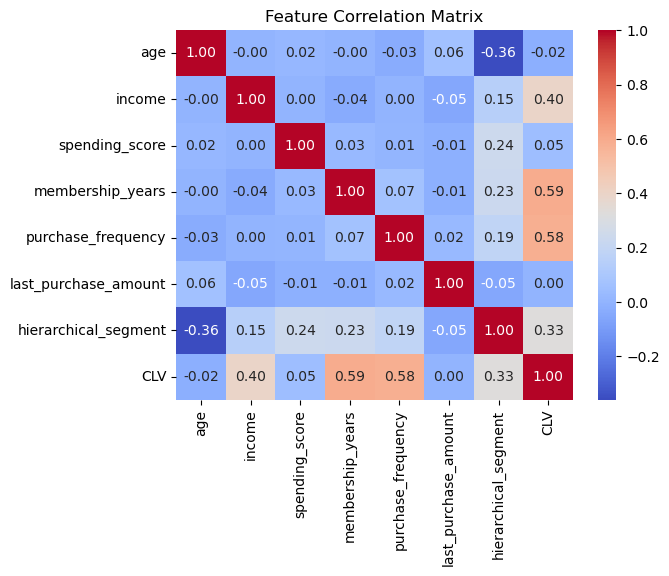

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,hierarchical_segment,CLV
age,1.000000,-0.000688,0.017707,-0.003431,-0.030137,0.061599,-0.359232,-0.024250
income,-0.000688,1.000000,0.000020,-0.035783,0.000533,-0.054006,0.147090,0.396114
spending_score,0.017707,0.000020,1.000000,0.026726,0.006708,-0.014475,0.239283,0.047199
membership_years,-0.003431,-0.035783,0.026726,1.000000,0.069532,-0.014135,0.232485,0.592352
purchase_frequency,-0.030137,0.000533,0.006708,0.069532,1.000000,0.024400,0.186705,0.581350
last_purchase_amount,0.061599,-0.054006,-0.014475,-0.014135,0.024400,1.000000,-0.053692,0.000935
hierarchical_segment,-0.359232,0.147090,0.239283,0.232485,0.186705,-0.053692,1.000000,0.325943
CLV,-0.024250,0.396114,0.047199,0.592352,0.581350,0.000935,0.325943,1.000000


In [106]:
# 'id' sütununu çıkarıyoruz
numeric_data = data.drop(columns=['id', 'dbscan_segment', 'z_income', 'z_spending']).select_dtypes(include=['float64', 'int64'])
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini çiziyoruz
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

numeric_data.corr()



Kategorik Verilerin İncelenmesi: Cinsiyet, tercih edilen kategori gibi kategorik değişkenlerin dağılımını analiz edin. Bu, segmentasyon ve modelleme sürecinde faydalı olabilir.

# 2. Müşteri Segmentasyonu Algoritmaları
Müşteri segmentasyonu, benzer özelliklere sahip müşteri gruplarını tanımlamak için farklı algoritmalar kullanarak yapılabilir. Aşağıdaki algoritmalar segmentasyon için kullanılabilir:

a. K-Means Kümeleme
K-Means, müşterileri belirli sayıda kümeye (gruba) ayıran popüler bir kümeleme algoritmasıdır. Bu, müşteri davranışlarını ve demografik özellikleri analiz etmek için iyi bir seçenektir.

Adımlar:

Veri Ön İşleme: Sayısal veriler için standartlaştırma (özellikle K-Means için) önemlidir.
Kümelenmiş Grupların Analizi: Hangi müşterilerin hangi kümelerde yer aldığını inceleyin.
Kümülatif Dağılımlar: Segmentlere göre gelir, harcama skoru gibi özelliklerin dağılımlarını inceleyin.
Python Kodu:

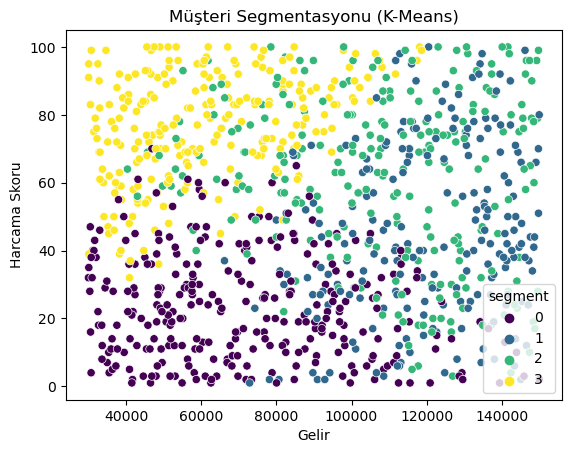

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veriyi ölçeklendirme
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']])

# K-Means Kümeleme
kmeans = KMeans(n_clusters=4, random_state=42)
data['segment'] = kmeans.fit_predict(data_scaled)

# Kümeleme Sonuçları Görselleştirme
sns.scatterplot(x=data['income'], y=data['spending_score'], hue=data['segment'], palette='viridis')
plt.title('Müşteri Segmentasyonu (K-Means)')
plt.xlabel('Gelir')
plt.ylabel('Harcama Skoru')
plt.show()


# 1. Temel Keşifsel Veri Analizi (EDA)
İlk adım, veri setinin genel yapısını ve özelliklerini anlamaktır.

In [87]:
# Genel bilgi ve eksik değer kontrolü
data.info()

# Sayısal kolonların istatistiksel özetleri
data.describe()

# Eksik değerlerin kontrolü
missing_values = data.isnull().sum()
print("Eksik Değerler:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    1000 non-null   int64   
 1   age                   1000 non-null   int64   
 2   gender                1000 non-null   object  
 3   income                1000 non-null   int64   
 4   spending_score        1000 non-null   int64   
 5   membership_years      1000 non-null   int64   
 6   purchase_frequency    1000 non-null   int64   
 7   preferred_category    1000 non-null   object  
 8   last_purchase_amount  1000 non-null   float64 
 9   segment               1000 non-null   category
 10  hierarchical_segment  1000 non-null   int64   
 11  dbscan_segment        1000 non-null   int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 87.2+ KB
Eksik Değerler:
 id                      0
age                     0
gender               

# 2. Veri Görselleştirme
Özellikler arasındaki dağılımları ve ilişkileri incelemek için görselleştirme yapılabilir.

Gelir ve Harcama Skoru Dağılımı

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


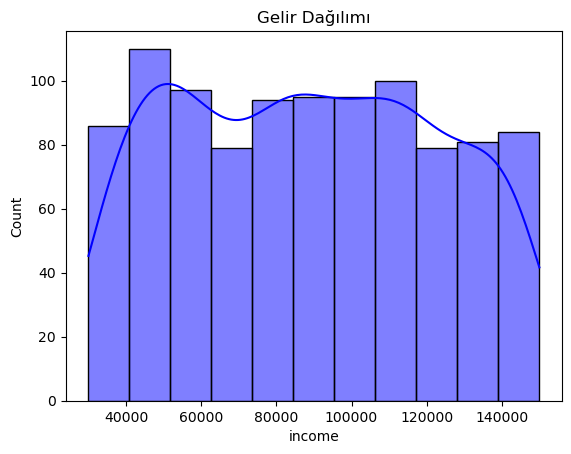

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


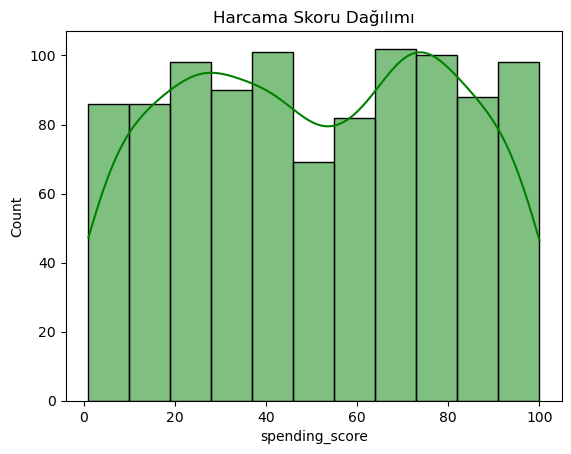

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gelir dağılımı
sns.histplot(data['income'], kde=True, color='blue')
plt.title('Gelir Dağılımı')
plt.show()

# Harcama skoru dağılımı
sns.histplot(data['spending_score'], kde=True, color='green')
plt.title('Harcama Skoru Dağılımı')
plt.show()


# Yaş ve Üyelik Süresi İlişkisi

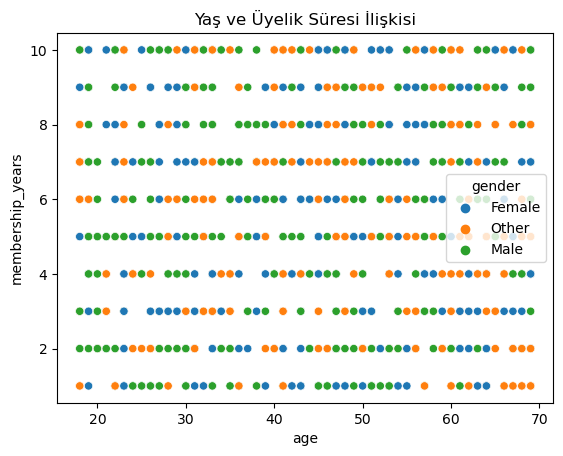

In [89]:
sns.scatterplot(x='age', y='membership_years', data=data, hue='gender')
plt.title('Yaş ve Üyelik Süresi İlişkisi')
plt.show()


# Kategorik Verilerin Görselleştirilmesi

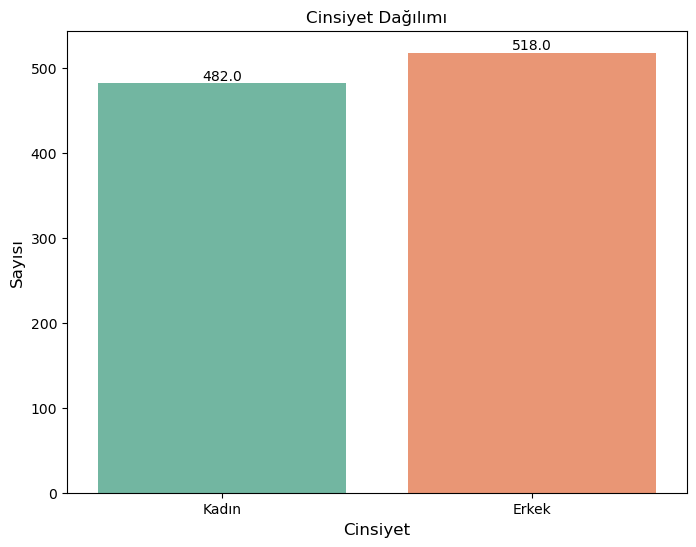

Cinsiyet Dağılımı:
gender
Erkek    518
Kadın    482
Name: count, dtype: int64


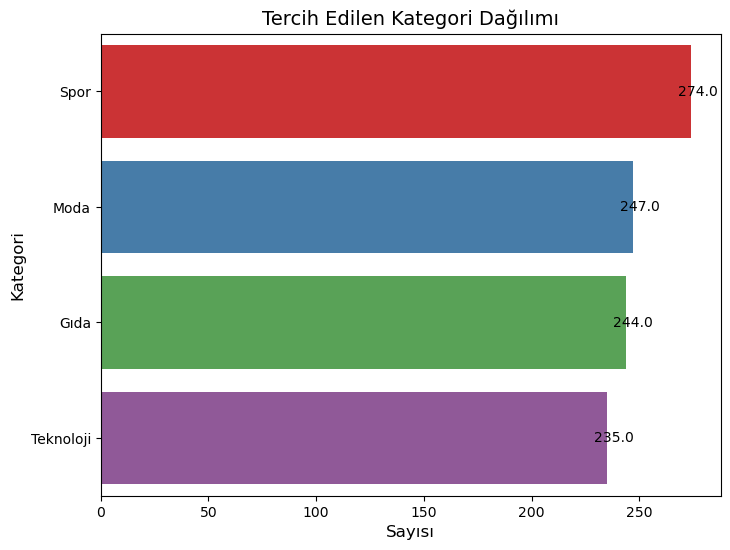


Tercih Edilen Kategori Dağılımı:
preferred_category
Spor         274
Moda         247
Gıda         244
Teknoloji    235
Name: count, dtype: int64


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Örnek veri seti
data = pd.DataFrame({
    'gender': np.random.choice(['Kadın', 'Erkek'], size=1000),
    'preferred_category': np.random.choice(['Teknoloji', 'Spor', 'Moda', 'Gıda'], size=1000)
})

# Cinsiyet Dağılımı
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Cinsiyet Dağılımı', fontsize=12)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Sayısı', fontsize=12)

# Çubukların üzerine sayıları ekleme
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 5), textcoords='offset points')

plt.show()

# Sayısal değerleri yazdırma
cinsiyet_sayilari = data['gender'].value_counts()
print("Cinsiyet Dağılımı:")
print(cinsiyet_sayilari)

# Tercih Edilen Kategori Dağılımı
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(y='preferred_category', data=data, 
                    order=data['preferred_category'].value_counts().index, 
                    palette='Set1')
plt.title('Tercih Edilen Kategori Dağılımı', fontsize=14)
plt.xlabel('Sayısı', fontsize=12)
plt.ylabel('Kategori', fontsize=12)

# Çubukların üzerine sayıları ekleme
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', 
                 (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(5, 0), textcoords='offset points')

plt.show()

# Sayısal değerleri yazdırma
kategori_sayilari = data['preferred_category'].value_counts()
print("\nTercih Edilen Kategori Dağılımı:")
print(kategori_sayilari)


# 3. K-Means ile Müşteri Segmentasyonu
Müşterileri benzer davranışlarına göre gruplamak için K-Means algoritması kullanılabilir.

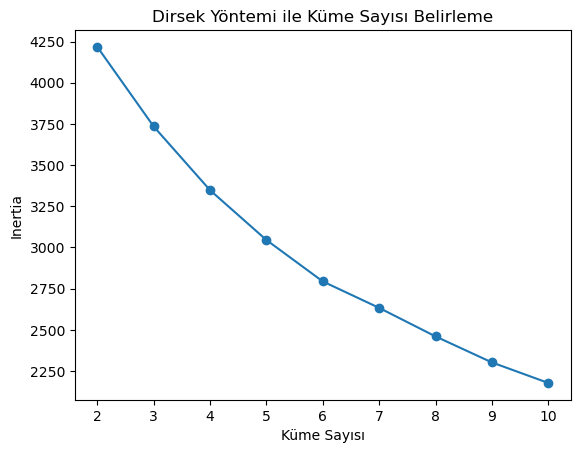

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

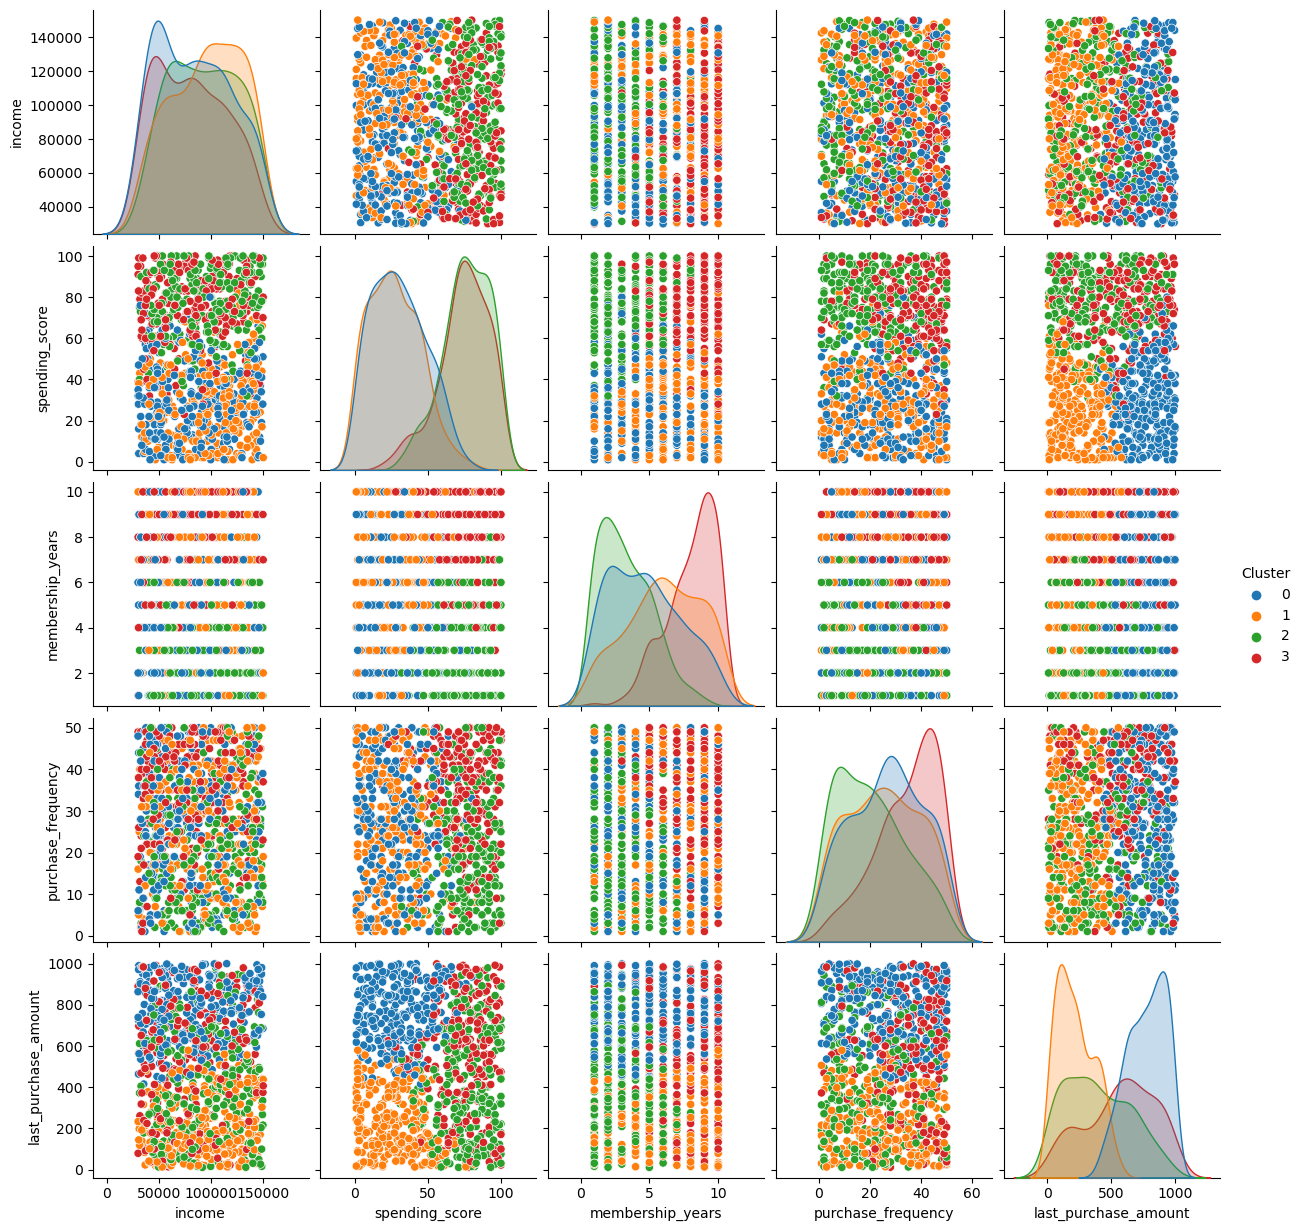

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sayısal özellikleri seçme
features = ['income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
scaled_features = StandardScaler().fit_transform(data[features])

# En uygun küme sayısını belirlemek için dirsek yöntemi
inertia = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Dirsek grafiği
plt.plot(cluster_range, inertia, marker='o')
plt.title('Dirsek Yöntemi ile Küme Sayısı Belirleme')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.show()

# Optimum kümeleme için K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Küme analizi sonuçları
sns.pairplot(data, hue='Cluster', vars=features, palette='tab10')
plt.show()


# 4. Özel Müşteri Analizleri
En Yüksek Harcama Yapanlar

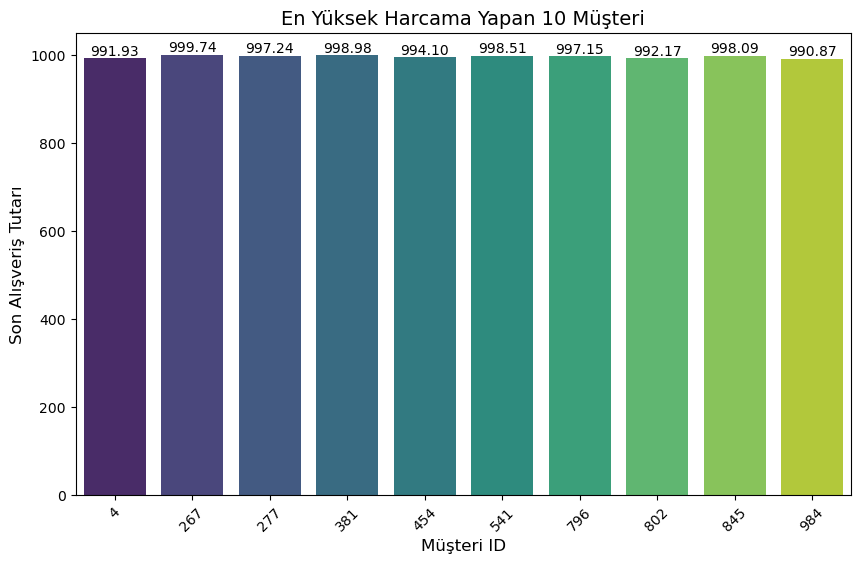

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# En yüksek harcama yapan ilk 10 müşteri
top_spenders = data.nlargest(10, 'last_purchase_amount')

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='id', y='last_purchase_amount', data=top_spenders, palette='viridis')

# Başlık ve etiketler
plt.title('En Yüksek Harcama Yapan 10 Müşteri', fontsize=14)
plt.xlabel('Müşteri ID', fontsize=12)
plt.ylabel('Son Alışveriş Tutarı', fontsize=12)

# Müşteri ID'lerini döndürme
plt.xticks(rotation=45)

# Çubukların üzerine değerleri ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Grafik gösterme
plt.show()


In [93]:
top_spenders = data.nlargest(10, 'last_purchase_amount')
print("En Yüksek Harcama Yapan Müşteriler:\n", top_spenders)


En Yüksek Harcama Yapan Müşteriler:
       id  age  gender  income  spending_score  membership_years  \
266  267   57  Female  114972              42                 9   
380  381   67  Female  104036              56                10   
540  541   33  Female  103063              16                 3   
844  845   45  Female   57615              30                 5   
276  277   53   Other   94392              38                 5   
795  796   47    Male   92114              17                 7   
453  454   27    Male  143992              31                 2   
801  802   51    Male  107033              96                 3   
3      4   40   Other   47099              74                 9   
983  984   51   Other   91682              27                 9   

     purchase_frequency preferred_category  last_purchase_amount segment  \
266                  12      Home & Garden                999.74    High   
380                  37             Sports                998.98    High 

# Tercih Edilen Kategorilere Göre Gelir Dağılımı

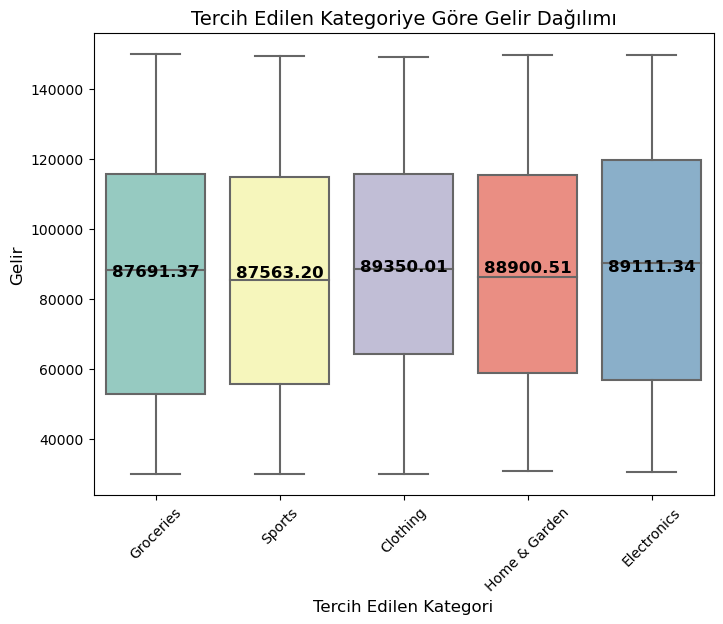

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tercih edilen kategoriye göre boxplot çizme
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='preferred_category', y='income', data=data, palette='Set3')

# Grafik başlığı
plt.title('Tercih Edilen Kategoriye Göre Gelir Dağılımı', fontsize=14)

# Her bir boxplot için etiketleme
for i, category in enumerate(data['preferred_category'].unique()):
    # Her kategori için ortalama geliri hesapla
    mean_income = data[data['preferred_category'] == category]['income'].mean()
    
    # Ortalamayı boxplot üzerine etiket olarak ekle
    plt.text(i, mean_income, f'{mean_income:.2f}', color='black', 
             ha='center', va='center', fontsize=12, fontweight='bold')

# X eksenindeki etiketlerin döndürülmesi
plt.xticks(rotation=45)

# X ve Y eksenlerine etiket ekleme
plt.xlabel('Tercih Edilen Kategori', fontsize=12)
plt.ylabel('Gelir', fontsize=12)

# Grafik gösterme
plt.show()


# Yaş Gruplarına Göre Harcama Skoru

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


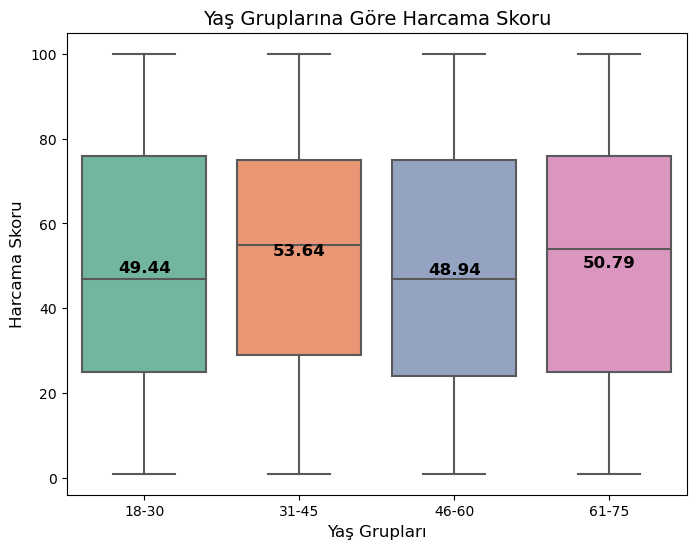

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Yaş gruplarını oluşturma
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 45, 60, 75], labels=['18-30', '31-45', '46-60', '61-75'])

# Yaş grubuna göre boxplot çizme
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='age_group', y='spending_score', data=data, palette='Set2')

# Grafik başlığı
plt.title('Yaş Gruplarına Göre Harcama Skoru', fontsize=14)

# Her bir boxplot için etiketleme
for i, age_group in enumerate(data['age_group'].cat.categories):
    # Her yaş grubu için ortalama harcama skorunu hesapla
    mean_spending_score = data[data['age_group'] == age_group]['spending_score'].mean()
    
    # Ortalamayı boxplot üzerine etiket olarak ekle
    plt.text(i, mean_spending_score, f'{mean_spending_score:.2f}', color='black', 
             ha='center', va='center', fontsize=12, fontweight='bold')

# X ve Y eksenlerine etiket ekleme
plt.xlabel('Yaş Grupları', fontsize=12)
plt.ylabel('Harcama Skoru', fontsize=12)

# Grafik gösterme
plt.show()


Random Forest Model:
RandomForestRegressor(random_state=42)
Mean Squared Error (MSE): 924.76
R-squared Score (R²): -0.17


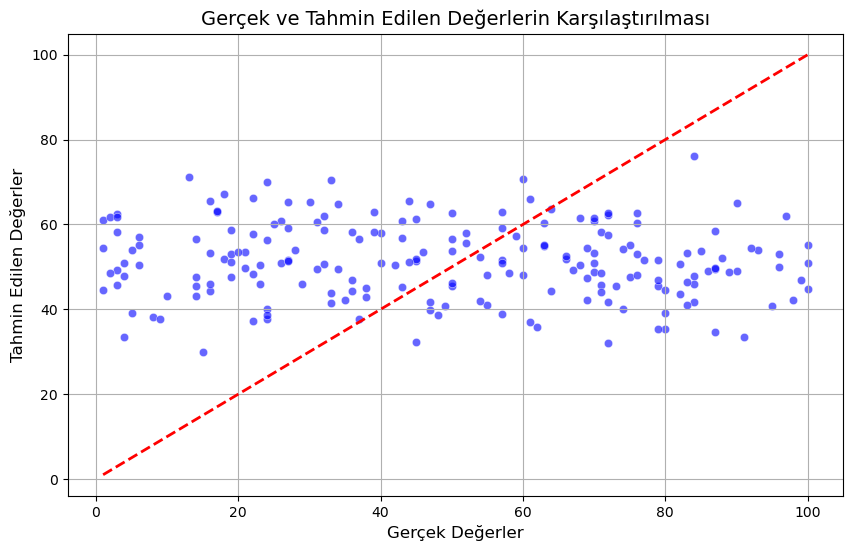

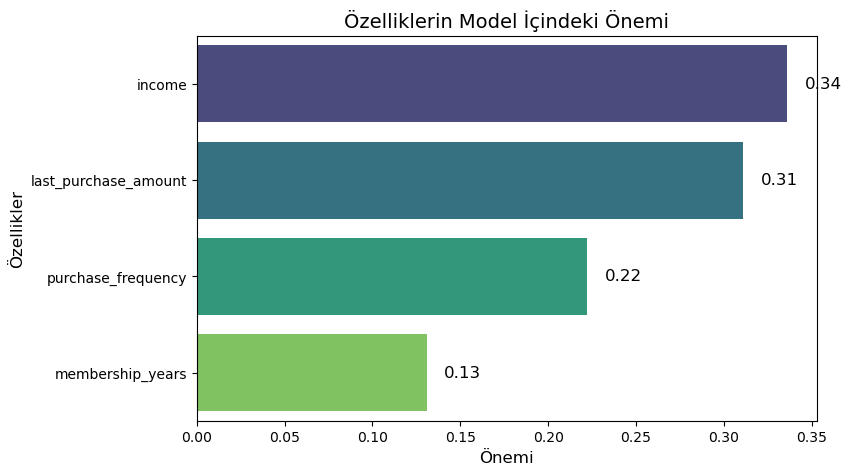

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Özellikler ve hedef değişken
features = ['income', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
X = data[features]
y = data['spending_score']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin ve performans değerlendirme
y_pred = model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Modelin açıklaması
print("Random Forest Model:")
print(model)

# Performans Metrikleri
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması', fontsize=14)
plt.xlabel('Gerçek Değerler', fontsize=12)
plt.ylabel('Tahmin Edilen Değerler', fontsize=12)
plt.grid(True)
plt.show()

# Önemli Özelliklerin Görselleştirilmesi
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Özelliklerin Model İçindeki Önemi', fontsize=14)
plt.xlabel('Önemi', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)

# Sütunların etiketlenmesi
for i in range(features_df.shape[0]):
    plt.text(features_df.Importance.iloc[i] + 0.01, i, f'{features_df.Importance.iloc[i]:.2f}', 
             color='black', ha="left", va="center", fontsize=12)

plt.show()


Bu analizlerle veri setinizdeki müşteri davranışlarını daha iyi anlayabilir ve segmentasyon çalışmalarıyla hedef kitlenize yönelik stratejiler geliştirebilirsiniz.

# 1. Yaşam Boyu Değer (Customer Lifetime Value - CLV) Hesaplama
Müşterilerin işletmeye olan toplam katkısını ölçmek için CLV hesaplanabilir. Bu metrik, müşterinin gelirine, alışveriş sıklığına ve üyelik süresine dayalıdır.

En Yüksek CLV'ye Sahip Müşteriler:
       id  age  gender  income  spending_score  membership_years  \
950  951   41   Other  134487               7                10   
716  717   47    Male  136278              76                10   
600  601   53  Female  137854              33                10   
264  265   63    Male  142287              77                10   
511  512   33    Male  132968              49                10   
442  443   47   Other  138199              79                10   
531  532   19    Male  146165              38                 9   
352  353   61   Other  120516             100                10   
25    26   33   Other  141757              60                10   
191  192   63   Other  109506              48                10   

     purchase_frequency preferred_category  last_purchase_amount segment  \
950                  50        Electronics                556.10    High   
716                  48           Clothing                233.64    High  

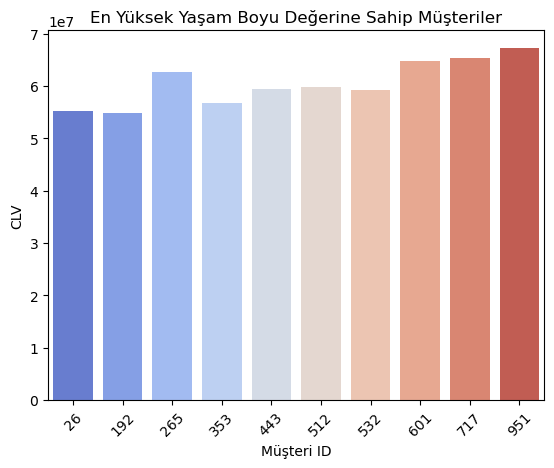

In [98]:
data['CLV'] = data['income'] * data['purchase_frequency'] * data['membership_years']

# En yüksek CLV'ye sahip müşteriler
top_clv_customers = data.nlargest(10, 'CLV')
print("En Yüksek CLV'ye Sahip Müşteriler:\n", top_clv_customers)

# Görselleştirme
sns.barplot(x='id', y='CLV', data=top_clv_customers, palette='coolwarm')
plt.title('En Yüksek Yaşam Boyu Değerine Sahip Müşteriler')
plt.xlabel('Müşteri ID')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()


# 2. Müşteri Kaybı (Churn) Tahmini
Müşterilerin kayıp olma ihtimalini tahmin etmek için sınıflandırma modelleri kullanılabilir. Örneğin:

"Son Alışveriş Tutarı" ve "Alışveriş Sıklığı" düşük olan müşteriler kayıp riski taşıyabilir.
Adımlar:
Yeni bir churn (kayıp) sütunu oluşturun (örneğin, belirli bir eşik değerine göre sınıflandırma).
Sınıflandırma modeli kullanarak kayıp müşterileri tahmin edin.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

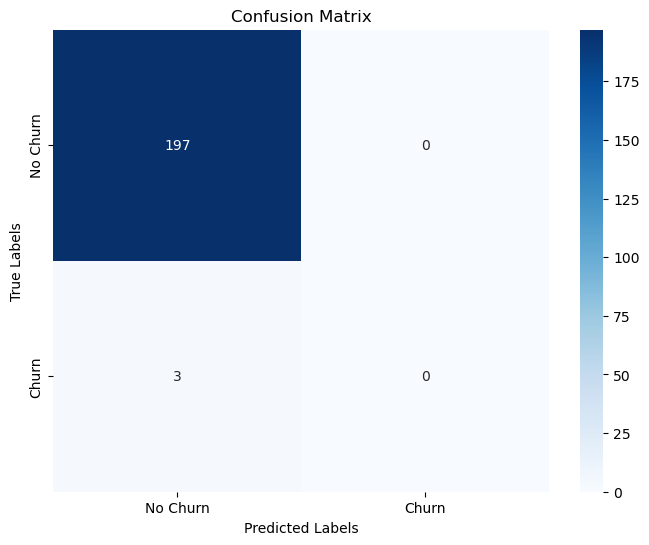

In [99]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Kayıp müşterileri etiketleme (örnek eşik değerleri)
data['churn'] = (data['purchase_frequency'] < 10) & (data['last_purchase_amount'] < 100)
data['churn'] = data['churn'].astype(int)

# Özellikler ve hedef değişken
features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']
target = 'churn'

# Veri setini ayırma
X = data[features]
y = data[target]

# Model oluşturma
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler ve performans
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# 3. Seçimsel Kampanya Analizi
Müşterilerin tercih ettiği kategorilere göre pazarlama kampanyaları optimize edilebilir. Hangi ürün kategorilerinin daha popüler olduğunu ve gelir dağılımını inceleyebilirsiniz.

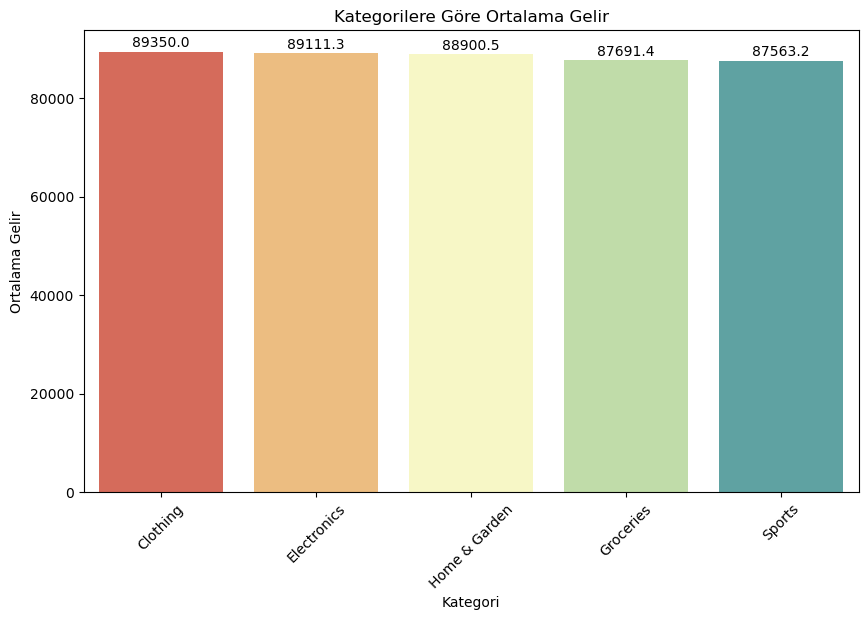

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorilere göre gelir analizi
category_income = data.groupby('preferred_category')['income'].mean().sort_values(ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=category_income.index, y=category_income.values, palette='Spectral')

# Ortalama gelirleri sütun üzerinde etiketleme
for i, v in enumerate(category_income.values):
    plt.text(i, v + 1000, round(v, 1), ha='center')

plt.title('Kategorilere Göre Ortalama Gelir')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Gelir')
plt.xticks(rotation=45)
plt.show()


# 5. Gelir ve Harcama Skoruna Göre Müşteri Matrisi
Müşterileri gelir ve harcama skorlarına göre dört gruba ayırarak analiz yapabilirsiniz:

Yüksek Gelir, Yüksek Harcama: En değerli müşteriler.
Yüksek Gelir, Düşük Harcama: Potansiyel artırılabilir müşteriler.
Düşük Gelir, Yüksek Harcama: Fiyat odaklı müşteriler.
Düşük Gelir, Düşük Harcama: Düşük katkılı müşteriler.

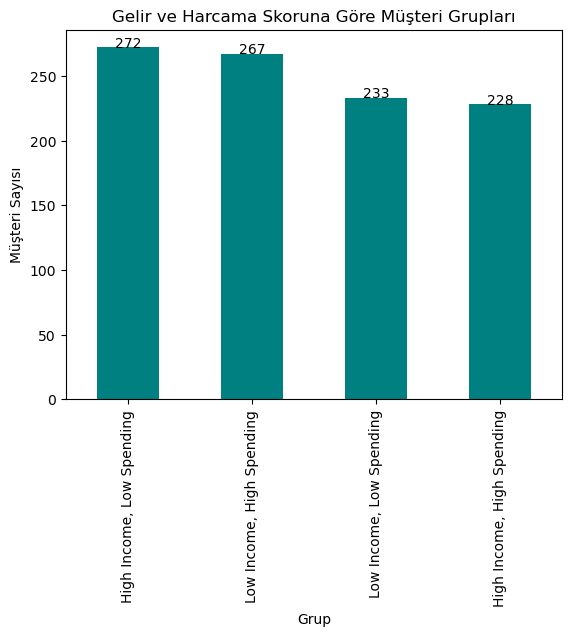

In [102]:
# Gelir ve harcama skoru eşik değerleri
income_median = data['income'].median()
spending_median = data['spending_score'].median()

# Müşteri segmentasyonu
data['income_spending_group'] = data.apply(
    lambda x: 'High Income, High Spending' if x['income'] > income_median and x['spending_score'] > spending_median
    else 'High Income, Low Spending' if x['income'] > income_median
    else 'Low Income, High Spending' if x['spending_score'] > spending_median
    else 'Low Income, Low Spending',
    axis=1
)


# Görselleştirme
group_counts = data['income_spending_group'].value_counts()
ax = group_counts.plot(kind='bar', color='teal')

# Gruplar üzerinde verileri etiketleme
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center')

plt.title('Gelir ve Harcama Skoruna Göre Müşteri Grupları')
plt.xlabel('Grup')
plt.ylabel('Müşteri Sayısı')
plt.show()



# 7. Aykırı Müşterilerin Tespiti
Gelir ve harcama skorunda aykırı değerler, önemli içgörüler sunabilir. Aykırı müşterileri tespit ederek, özel pazarlama stratejileri geliştirebilirsiniz.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Aykırı Müşteriler:
 Empty DataFrame
Columns: [id, age, gender, income, spending_score, membership_years, purchase_frequency, preferred_category, last_purchase_amount, segment, hierarchical_segment, dbscan_segment, Cluster, age_group, CLV, churn, purchase_date, income_spending_group, z_income, z_spending]
Index: []


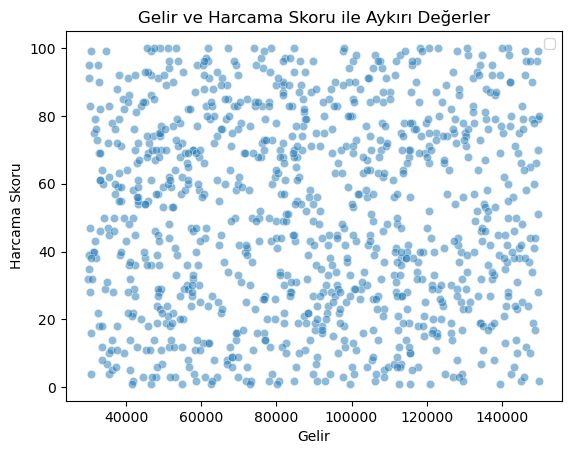

In [104]:
from scipy.stats import zscore

# Z-Score ile aykırı değer tespiti
data['z_income'] = zscore(data['income'])
data['z_spending'] = zscore(data['spending_score'])

outliers = data[(data['z_income'] > 3) | (data['z_spending'] > 3)]
print("Aykırı Müşteriler:\n", outliers)

# Aykırı değerleri görselleştirme
sns.scatterplot(x='income', y='spending_score', data=data, alpha=0.5)
sns.scatterplot(x='income', y='spending_score', data=outliers, color='red', label='Outliers')
plt.title('Gelir ve Harcama Skoru ile Aykırı Değerler')
plt.xlabel('Gelir')
plt.ylabel('Harcama Skoru')
plt.legend()
plt.show()


# 8. Özellik Önem Analizi
Müşteri davranışlarını etkileyen en önemli özellikleri tespit etmek için özellik önemi analizleri yapılabilir.

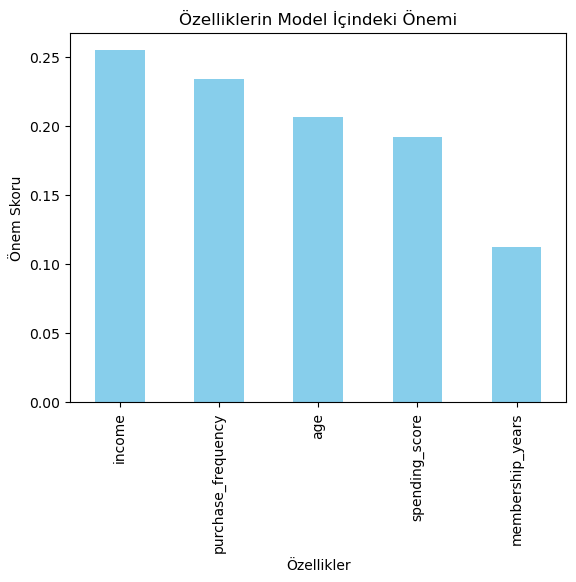

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Özellik önemi
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Özelliklerin Model İçindeki Önemi')
plt.xlabel('Özellikler')
plt.ylabel('Önem Skoru')
plt.show()


Bu analizler, müşterilerin davranışlarını ve segmentlerini daha derinlemesine anlamanızı sağlar. Hangi yöntemin kullanılacağı, iş hedeflerinize ve veri setindeki bilgiye bağlıdır

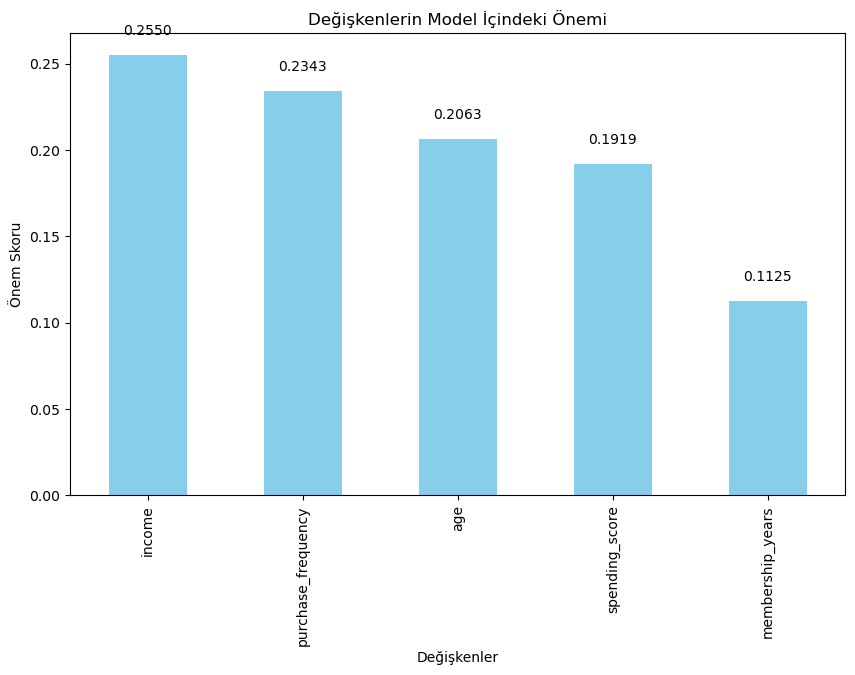

In [118]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Özellik önemi
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Özellik önemlerini bar grafiği ile görselleştirme
ax = feature_importances.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Değişkenlerin Model İçindeki Önemi')
plt.xlabel('Değişkenler')
plt.ylabel('Önem Skoru')

# Grafik üzerinde her bir çubuğun üstüne sayısal değeri ekleme
for i, v in enumerate(feature_importances):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.show()


# Sandom Forest

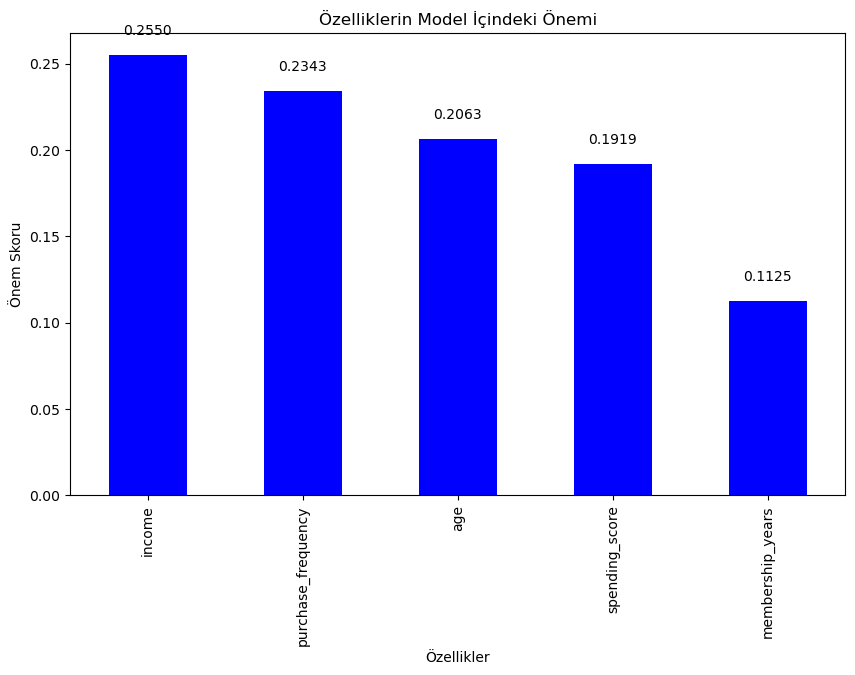

In [119]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Eğitim verisi ve özellikler (X_train ve y_train verileri önceden tanımlanmalı)
# 'features' isimli liste, modelin eğitildiği özelliklerin isimlerini içermelidir
# Örneğin: features = ['age', 'income', 'spending_score', ...]

# Özellik önemlerini hesaplama
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Özelliklerin önem derecelerini sırala
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Özelliklerin önemlerini bar grafiği ile görselleştirme
ax = feature_importances.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Özelliklerin Model İçindeki Önemi')
plt.xlabel('Özellikler')
plt.ylabel('Önem Skoru')

# Grafik üzerinde her bir çubuğun üstüne sayısal değeri ekleme
for i, v in enumerate(feature_importances):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.show()
